### Work Flow
Data collection ---> Data Preprocessing ---> Data Analysis ---> Model Preparation ---> Model Evaluation

In [174]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

### Data Collection

In [175]:
# load the data
breast_cancer = pd.read_csv('data.csv')
print(breast_cancer.shape)
breast_cancer.head()

(569, 33)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


### Data Preprocessing

In [176]:
# get some information on the dataset
breast_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [177]:
# check for missing values
breast_cancer.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [178]:
# drop the unnamed:32 and id column since it has no values in it entirely
breast_cancer = breast_cancer.drop(['Unnamed: 32', 'id'], axis=1)

In [179]:
# check columns to see if the unused column has been removed
breast_cancer.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

### Data Analysis

In [180]:
# get some statistical info 
breast_cancer.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [181]:
# check the types of cancer
breast_cancer['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [182]:
# converting categorical columns
breast_cancer['diagnosis'] = breast_cancer['diagnosis'].replace({'M':0, 'B':1})

In [183]:
# perform one-hot encoding on the "Diagnosis" column
#diagnosis_encoded = pd.get_dummies(breast_cancer['diagnosis'], prefix='diagnosis')

# concatenate teh original dataframe and the encoded labels
#breast_cancer = pd.concat([breast_cancer, diagnosis_encoded], axis=1)

# print the 1st 5 rows
#breast_cancer.head()

In [184]:
# calculate teh correlation matrix
correlation_matrix = breast_cancer.corr()

# set the threshold for correlation
correlation_threshold = 0.5

In [185]:
breast_cancer.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [186]:
# Find highly correlated features
highly_correlated_features = correlation_matrix[((correlation_matrix > correlation_threshold) | (correlation_matrix < -correlation_threshold)) & (correlation_matrix != 1)]
highly_correlated_features = highly_correlated_features.unstack().dropna().reset_index()

# Print the highly correlated features
print("Highly Correlated Features:")
for index, row in highly_correlated_features.iterrows():
    feature1 = row['level_0']
    feature2 = row['level_1']
    correlation = row[0]
    print(f"{feature1} - {feature2}: {correlation:.2f}")

Highly Correlated Features:
diagnosis - radius_mean: -0.73
diagnosis - perimeter_mean: -0.74
diagnosis - area_mean: -0.71
diagnosis - compactness_mean: -0.60
diagnosis - concavity_mean: -0.70
diagnosis - concave points_mean: -0.78
diagnosis - radius_se: -0.57
diagnosis - perimeter_se: -0.56
diagnosis - area_se: -0.55
diagnosis - radius_worst: -0.78
diagnosis - perimeter_worst: -0.78
diagnosis - area_worst: -0.73
diagnosis - compactness_worst: -0.59
diagnosis - concavity_worst: -0.66
diagnosis - concave points_worst: -0.79
radius_mean - diagnosis: -0.73
radius_mean - perimeter_mean: 1.00
radius_mean - area_mean: 0.99
radius_mean - compactness_mean: 0.51
radius_mean - concavity_mean: 0.68
radius_mean - concave points_mean: 0.82
radius_mean - radius_se: 0.68
radius_mean - perimeter_se: 0.67
radius_mean - area_se: 0.74
radius_mean - radius_worst: 0.97
radius_mean - perimeter_worst: 0.97
radius_mean - area_worst: 0.94
radius_mean - concavity_worst: 0.53
radius_mean - concave points_worst: 0

In [187]:
# find highly correlated features with diagnosis
highly_correlated_features = np.abs(correlation_matrix['diagnosis']).sort_values(ascending=False)
highly_correlated_features= highly_correlated_features[highly_correlated_features > correlation_threshold]

# print the highly correlated features
print("Highly Correlated Features with Diagnosis: ")
for feature, correlation in highly_correlated_features.iteritems():
    print(f"{feature}: {correlation:.2f}")

Highly Correlated Features with Diagnosis: 
diagnosis: 1.00
concave points_worst: 0.79
perimeter_worst: 0.78
concave points_mean: 0.78
radius_worst: 0.78
perimeter_mean: 0.74
area_worst: 0.73
radius_mean: 0.73
area_mean: 0.71
concavity_mean: 0.70
concavity_worst: 0.66
compactness_mean: 0.60
compactness_worst: 0.59
radius_se: 0.57
perimeter_se: 0.56
area_se: 0.55


In [188]:
# set the background
sns.set()

In [189]:
breast_cancer['diagnosis'] = breast_cancer['diagnosis'].replace({0:'M', 1:'B'})

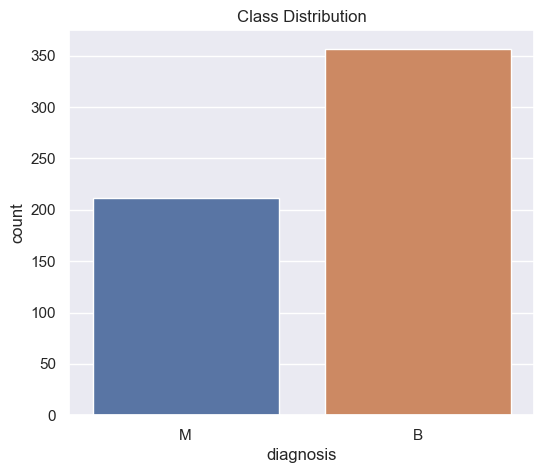

In [190]:
# class distribution
plt.figure(figsize=(6,5))
sns.countplot(x='diagnosis', data=breast_cancer)
plt.title("Class Distribution")
plt.show()

In [191]:
# correlation matrix
#plt.figure(figsize=(12, 10))
#sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
#plt.title('Correlation Matrix')
#plt.show()

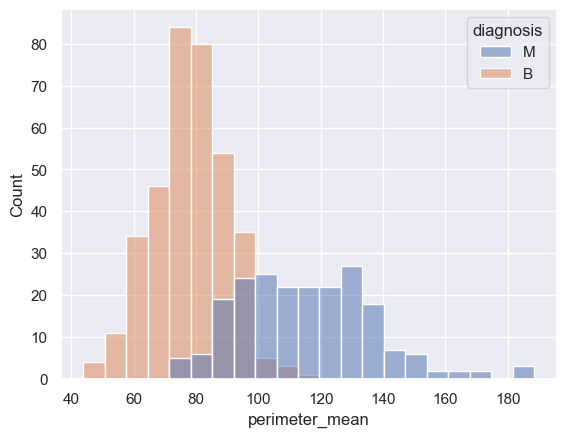

In [192]:
sns.histplot(data=breast_cancer, x='perimeter_mean', hue='diagnosis')
plt.show()

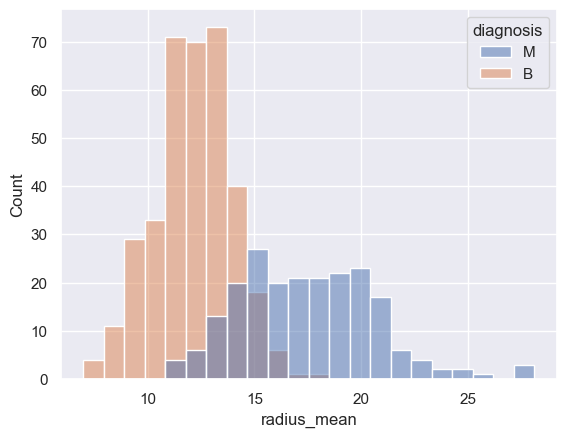

In [193]:
sns.histplot(data=breast_cancer, x='radius_mean', hue='diagnosis')
plt.show()

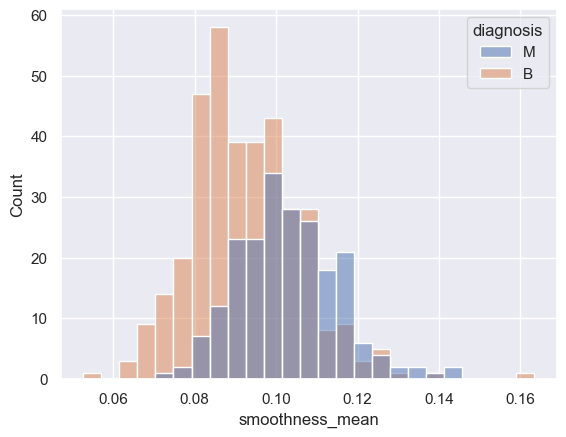

In [194]:
sns.histplot(data=breast_cancer, x='smoothness_mean', hue='diagnosis')
plt.show()

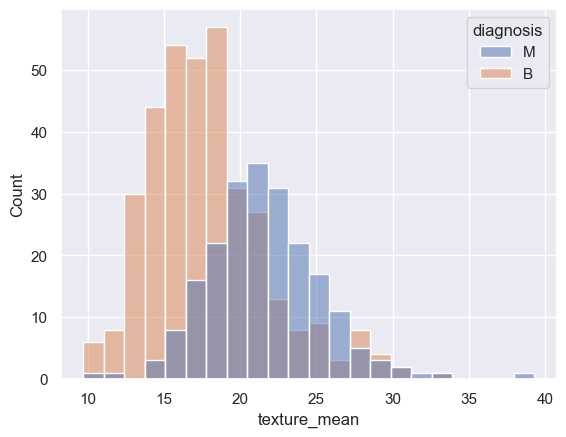

In [195]:
sns.histplot(data=breast_cancer, x='texture_mean', hue='diagnosis')
plt.show()

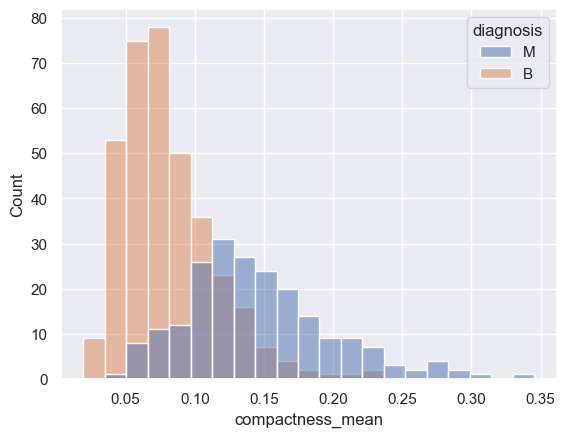

In [196]:
sns.histplot(data=breast_cancer, x='compactness_mean', hue='diagnosis')
plt.show()

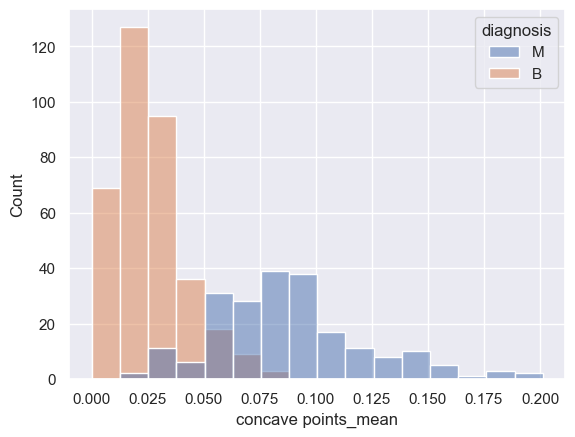

In [197]:
sns.histplot(data=breast_cancer, x='concave points_mean', hue='diagnosis')
plt.show()

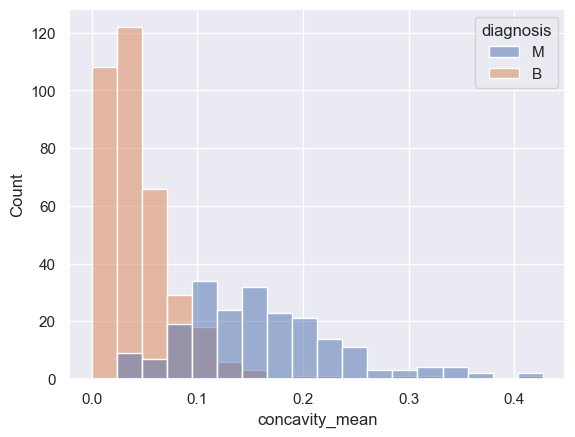

In [198]:
sns.histplot(data=breast_cancer, x='concavity_mean', hue='diagnosis')
plt.show()

In [199]:
breast_cancer.groupby('diagnosis').mean()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,,,,,,,,,,,,,,,,,,,,,
B,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442
M,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530


In [200]:
breast_cancer['diagnosis'] = breast_cancer['diagnosis'].replace({0:'M', 1:'B'})

### Model Preparation

In [201]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [202]:
# split the dataset into features and target
X = breast_cancer.drop('diagnosis', axis=1)
y = breast_cancer['diagnosis']

In [203]:
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [204]:
# standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

###### Logistic Regression

In [205]:
# Model 1

# logistic regression model
model = LogisticRegression()

# fit the model on the training data
model.fit(X_train, y_train)

# predict on the test data
y_pred = model.predict(X_test)

# evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# display the evaluation result
print(f"Accuracy: {accuracy*100:.4f}")
print("Classification REport: ")
print(classification_rep)

Accuracy: 95.6140
Classification REport: 
              precision    recall  f1-score   support

           B       0.95      0.99      0.97        71
           M       0.97      0.91      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [206]:
# Model 2

# logistic regression model
model = LogisticRegression()

# fit the model on the training data
model.fit(X_train_scaled, y_train)

# predict on the test data
y_pred = model.predict(X_test_scaled)

# evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# display the evaluation result
print(f"Accuracy: {accuracy*100:.4f}")
print("Classification REport: ")
print(classification_rep)

Accuracy: 98.2456
Classification REport: 
              precision    recall  f1-score   support

           B       0.97      1.00      0.99        71
           M       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [207]:
# Model 3

# hyperparameter tuning using GridSearchCV
param_grid = {'C': [0.1, 1, 10, 100], 'penalty': ['11', '12']}
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# get the best hyperparameters
best_params = grid_search.best_params_

# logistic regression model
model = LogisticRegression(**best_params)

# fit the model on the training data
model.fit(X_train, y_train)

# predict on the test data
y_pred = model.predict(X_test)

# evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# display the evaluation result
print(f"Accuracy: {accuracy*100:.4f}")
print("Classification REport: ")
print(classification_rep)

ValueError: 
All the 40 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Set Ups\Anaconda\ecow\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Set Ups\Anaconda\ecow\lib\site-packages\sklearn\linear_model\_logistic.py", line 1160, in fit
    self._validate_params()
  File "D:\Set Ups\Anaconda\ecow\lib\site-packages\sklearn\base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "D:\Set Ups\Anaconda\ecow\lib\site-packages\sklearn\utils\_param_validation.py", line 97, in validate_parameter_constraints
    raise InvalidParameterError(
sklearn.utils._param_validation.InvalidParameterError: The 'penalty' parameter of LogisticRegression must be a str among {'elasticnet', 'l1', 'none' (deprecated), 'l2'} or None. Got '11' instead.

--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Set Ups\Anaconda\ecow\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Set Ups\Anaconda\ecow\lib\site-packages\sklearn\linear_model\_logistic.py", line 1160, in fit
    self._validate_params()
  File "D:\Set Ups\Anaconda\ecow\lib\site-packages\sklearn\base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "D:\Set Ups\Anaconda\ecow\lib\site-packages\sklearn\utils\_param_validation.py", line 97, in validate_parameter_constraints
    raise InvalidParameterError(
sklearn.utils._param_validation.InvalidParameterError: The 'penalty' parameter of LogisticRegression must be a str among {'elasticnet', 'l1', 'none' (deprecated), 'l2'} or None. Got '12' instead.


In [208]:
# Model 4

# hyperparameter tuning using GridSearchCV
param_grid = {'C': [0.1, 1, 10, 100], 'penalty': ['11', '12']}
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

# get the best hyperparameters
best_params = grid_search.best_params_

# logistic regression model
model = LogisticRegression(**best_params)

# fit the model on the training data
model.fit(X_train_scaled, y_train)

# predict on the test data
y_pred = model.predict(X_test_scaled)

# evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# display the evaluation result
print(f"Accuracy: {accuracy*100:.4f}")
print("Classification REport: ")
print(classification_rep)

ValueError: 
All the 40 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Set Ups\Anaconda\ecow\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Set Ups\Anaconda\ecow\lib\site-packages\sklearn\linear_model\_logistic.py", line 1160, in fit
    self._validate_params()
  File "D:\Set Ups\Anaconda\ecow\lib\site-packages\sklearn\base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "D:\Set Ups\Anaconda\ecow\lib\site-packages\sklearn\utils\_param_validation.py", line 97, in validate_parameter_constraints
    raise InvalidParameterError(
sklearn.utils._param_validation.InvalidParameterError: The 'penalty' parameter of LogisticRegression must be a str among {'elasticnet', 'l1', 'none' (deprecated), 'l2'} or None. Got '11' instead.

--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Set Ups\Anaconda\ecow\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Set Ups\Anaconda\ecow\lib\site-packages\sklearn\linear_model\_logistic.py", line 1160, in fit
    self._validate_params()
  File "D:\Set Ups\Anaconda\ecow\lib\site-packages\sklearn\base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "D:\Set Ups\Anaconda\ecow\lib\site-packages\sklearn\utils\_param_validation.py", line 97, in validate_parameter_constraints
    raise InvalidParameterError(
sklearn.utils._param_validation.InvalidParameterError: The 'penalty' parameter of LogisticRegression must be a str among {'elasticnet', 'l1', 'none' (deprecated), 'l2'} or None. Got '12' instead.


###### Support Vector Machines

In [209]:
# Model 1

# support vector machine model
model = SVC()

# fit the model on the training data
model.fit(X_train, y_train)

# predict on the test data
y_pred = model.predict(X_test)

# evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# display the evaluation result
print(f"Accuracy: {accuracy*100:.4f}")
print("Classification REport: ")
print(classification_rep)

Accuracy: 94.7368
Classification REport: 
              precision    recall  f1-score   support

           B       0.92      1.00      0.96        71
           M       1.00      0.86      0.92        43

    accuracy                           0.95       114
   macro avg       0.96      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



In [210]:
# Model 2

# support vector machine model
model = SVC()

# fit the model on the training data
model.fit(X_train_scaled, y_train)

# predict on the test data
y_pred = model.predict(X_test_scaled)

# evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# display the evaluation result
print(f"Accuracy: {accuracy*100:.4f}")
print("Classification REport: ")
print(classification_rep)

Accuracy: 98.2456
Classification REport: 
              precision    recall  f1-score   support

           B       0.97      1.00      0.99        71
           M       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [211]:
# Model 3

# hyperparameter tuning using GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100], 
    'gamma': [0.1, 1, 10, 100],
    'kernel': ['lnear', 'rbf']
}
grid_search = GridSearchCV(SVC(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# get the best hyperparameters
best_params = grid_search.best_params_

# support vector machine model
model = SVC(**best_params)

# fit the model on the training data
model.fit(X_train, y_train)

# predict on the test datad
y_pred = model.predict(X_test)

# evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# display the evaluation result
print(f"Accuracy: {accuracy*100:.4f}")
print("Classification REport: ")
print(classification_rep)

Accuracy: 62.2807
Classification REport: 
              precision    recall  f1-score   support

           B       0.62      1.00      0.77        71
           M       0.00      0.00      0.00        43

    accuracy                           0.62       114
   macro avg       0.31      0.50      0.38       114
weighted avg       0.39      0.62      0.48       114



In [216]:
# Model 4

# hyperparameter tuning using GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100], 
    'gamma': [0.1, 1, 10, 100],
    'kernel': ['lnear', 'rbf']
}
grid_search = GridSearchCV(SVC(), param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

# get the best hyperparameters
best_params = grid_search.best_params_

# logistic regression model
model = SVC(**best_params)

# fit the model on the training data
model.fit(X_train_scaled, y_train)

# predict on the test data
y_pred = model.predict(X_test_scaled)

# evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# display the evaluation result
print(f"Accuracy: {accuracy*100:.4f}")
print("Classification REport: ")
print(classification_rep)

Accuracy: 96.4912
Classification REport: 
              precision    recall  f1-score   support

           B       0.97      0.97      0.97        71
           M       0.95      0.95      0.95        43

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



###### Random Forest Classifier

In [213]:
# Model 1

# random fores model
model = RandomForestClassifier()

# fit the model on the training data
model.fit(X_train, y_train)

# predict on the test data
y_pred = model.predict(X_test)

# evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# display the evaluation result
print(f"Accuracy: {accuracy*100:.4f}")
print("Classification REport: ")
print(classification_rep)

Accuracy: 96.4912
Classification REport: 
              precision    recall  f1-score   support

           B       0.96      0.99      0.97        71
           M       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [214]:
# Model 2

# random fores model
model = RandomForestClassifier()

# fit the model on the training data
model.fit(X_train_scaled, y_train)

# predict on the test data
y_pred = model.predict(X_test_scaled)

# evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# display the evaluation result
print(f"Accuracy: {accuracy*100:.4f}")
print("Classification REport: ")
print(classification_rep)

Accuracy: 96.4912
Classification REport: 
              precision    recall  f1-score   support

           B       0.96      0.99      0.97        71
           M       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [215]:
# Model 3

# hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300], 
    'max_depth': [3, 5, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# get the best hyperparameters
best_params = grid_search.best_params_

# random forest model
model = RandomForestClassifier(**best_params, random_state=42)

# fit the model on the training data
model.fit(X_train, y_train)

# predict on the test data
y_pred = model.predict(X_test)

# evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# display the evaluation result
print(f"Accuracy: {accuracy*100:.4f}")
print("Classification REport: ")
print(classification_rep)

KeyboardInterrupt: 

In [ ]:
# Model 4

# hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300], 
    'max_depth': [3, 5, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

# get the best hyperparameters
best_params = grid_search.best_params_

# random forest model
model = RandomForestClassifier(**best_params, random_state=42)

# fit the model on the training data
model.fit(X_train_scaled, y_train)

# predict on the test data
y_pred = model.predict(X_test_scaled)

# evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# display the evaluation result
print(f"Accuracy: {accuracy*100:.4f}")
print("Classification REport: ")
print(classification_rep)

###### Gradient Boosting Classifier

In [217]:
# Model 1

# gradient boosting model
model = GradientBoostingClassifier()

# fit the model on the training data
model.fit(X_train, y_train)

# predict on the test data
y_pred = model.predict(X_test)

# evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# display the evaluation result
print(f"Accuracy: {accuracy*100:.4f}")
print("Classification REport: ")
print(classification_rep)

Accuracy: 95.6140
Classification REport: 
              precision    recall  f1-score   support

           B       0.96      0.97      0.97        71
           M       0.95      0.93      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [218]:
# Model 2

# gradient boosting model
model = GradientBoostingClassifier()

# fit the model on the training data
model.fit(X_train_scaled, y_train)

# predict on the test data
y_pred = model.predict(X_test_scaled)

# evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# display the evaluation result
print(f"Accuracy: {accuracy*100:.4f}")
print("Classification REport: ")
print(classification_rep)

Accuracy: 96.4912
Classification REport: 
              precision    recall  f1-score   support

           B       0.96      0.99      0.97        71
           M       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [219]:
# Model 3

# hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300], 
    'learning_rate': [0.1, 0.05, 0.01],
    'max_depth': [3, 5, None]
}
grid_search = GridSearchCV(GradientBoostingClassifier(random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# get the best hyperparameters
best_params = grid_search.best_params_

# random forest model
model = GradientBoostingClassifier(**best_params, random_state=42)

# fit the model on the training data
model.fit(X_train, y_train)

# predict on the test data
y_pred = model.predict(X_test)

# evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# display the evaluation result
print(f"Accuracy: {accuracy*100:.4f}")
print("Classification REport: ")
print(classification_rep)

KeyboardInterrupt: 

In [220]:
# Model 4

# hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300], 
    'learning_rate': [0.1, 0.05, 0.01],
    'max_depth': [3, 5, None]
}
grid_search = GridSearchCV(GradientBoostingClassifier(random_state=42), param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

# get the best hyperparameters
best_params = grid_search.best_params_

# random forest model
model = GradientBoostingClassifier(**best_params, random_state=42)

# fit the model on the training data
model.fit(X_train_scaled, y_train)

# predict on the test data
y_pred = model.predict(X_test_scaled)

# evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# display the evaluation result
print(f"Accuracy: {accuracy*100:.4f}")
print("Classification REport: ")
print(classification_rep)

KeyboardInterrupt: 